In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
df = pd.read_csv('C:/Users/srira/OneDrive/Desktop/Python/Data Sets/Churn_Modelling.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

In [9]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns = ['Geography'], drop_first = True)

In [10]:
df.head()

RowNumber  CustomerId   Surname  CreditScore  Gender  Age  Tenure  \
0          1    15634602  Hargrave          619       0   42       2   
1          2    15647311      Hill          608       0   41       1   
2          3    15619304      Onio          502       0   42       8   
3          4    15701354      Boni          699       0   39       1   
4          5    15737888  Mitchell          850       0   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  Geography_Germany  Geography_Spain  
0       1              False            False  
1       0              False             True  
2       1              False            False  
3       0              False            False  
4       0              False             True

In [12]:
features = ['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember',
            'EstimatedSalary','Geography_Germany','Geography_Spain']
X = df[features]
y = df['Exited']

Model Training

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [17]:
X_train[:5], X_test[:5]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57946723,
         -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 ,  1.72572313,
         -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688, -0.57946723,
          1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272, -0.57946723,
         -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019, -0.57946723,
         -0.57638802]]),
 array([[-0.51250172,  0.90911166, -0.67729931, -0.69844549,  0.30084641,
          0.80510537, -1.57810057, -1.0502616 , -0.99096946,  1.73668

In [18]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [19]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [22]:
print(conf_matrix)
print(class_report)
print(accuracy)

[[1554   53]
 [ 209  184]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000

0.869


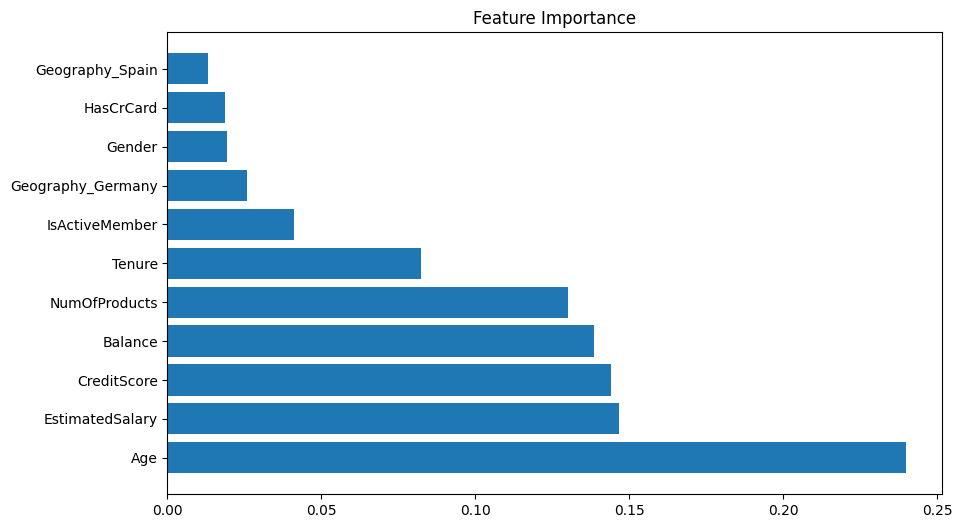

In [23]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize = (10,6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]),importances[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()

In [26]:
print(indices)
print(names)

[ 2  8  0  4  5  3  7  9  1  6 10]
['Age', 'EstimatedSalary', 'CreditScore', 'Balance', 'NumOfProducts', 'Tenure', 'IsActiveMember', 'Geography_Germany', 'Gender', 'HasCrCard', 'Geography_Spain']


In [30]:
from sklearn.linear_model import LogisticRegression

#Build and train the logistic regression model
log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)

#Make predictions
y_pred_log_reg = log_reg.predict(X_test)

#Evaluate the model
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(conf_matrix_log_reg, class_report_log_reg, accuracy_log_reg)

[[1541   66]
 [ 313   80]]               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000
 0.8105


In [32]:
from sklearn.svm import SVC

#Build and train the SVM model
svm_model = SVC(kernel = 'linear', random_state = 42)
svm_model.fit(X_train, y_train)

#Make predictions
y_pred_svm = svm_model.predict(X_test)

#Evaluate the model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(conf_matrix_svm, class_report_svm, accuracy_svm)

[[1607    0]
 [ 393    0]]               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000
 0.8035


c:\Users\srira\OneDrive\Desktop\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\srira\OneDrive\Desktop\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\srira\OneDrive\Desktop\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [33]:
from sklearn.neighbors import KNeighborsClassifier

#Build and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

#Make predictions
y_pred_knn = knn_model.predict(X_test)

#Evaluate the model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(conf_matrix_knn, class_report_knn, accuracy_knn)

[[1508   99]
 [ 251  142]]               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.59      0.36      0.45       393

    accuracy                           0.82      2000
   macro avg       0.72      0.65      0.67      2000
weighted avg       0.80      0.82      0.81      2000
 0.825


In [34]:
 from sklearn.ensemble import GradientBoostingClassifier

#Build and train the GradientBoosting model
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state = 42)
gbm_model.fit(X_train, y_train)

#Make predictions
y_pred_gbm = gbm_model.predict(X_test)

#Evaluate the model
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)

print(conf_matrix_gbm, class_report_gbm, accuracy_gbm)

[[1542   65]
 [ 202  191]]               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000
 0.8665


In [35]:
df.head()

RowNumber  CustomerId   Surname  CreditScore  Gender  Age  Tenure  \
0          1    15634602  Hargrave          619       0   42       2   
1          2    15647311      Hill          608       0   41       1   
2          3    15619304      Onio          502       0   42       8   
3          4    15701354      Boni          699       0   39       1   
4          5    15737888  Mitchell          850       0   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  Geography_Germany  Geography_Spain  
0       1              False            False  
1       0              False             True  
2       1              False            False  
3       0              False            False  
4       0              False             True

In [36]:
df = pd.read_csv('C:/Users/srira/OneDrive/Desktop/Python/Data Sets/Churn_Modelling.csv')

In [39]:
#Binary feature for Balance
df['BalanceZero'] = (df['Balance'] == 0).astype(int)

#Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins = [18,25,35,45,55,65,75,85,95], labels = ['18-25','26-35','36-45','46-55','56-65','66-75','76-85','86-95'])

#Balance to Salary Ratio
df['BalancetoSalaryRatio'] = df['Balance']/df['EstimatedSalary']

#Interaction feature between NumofProducts and IsActiveMember
df['ProductUsage'] = df['NumOfProducts']*df['IsActiveMember']

#Tenure Grouping
df['TenureGroup'] = pd.cut(df['Tenure'], bins = [0,2,5,7,10], labels = ['0-2','3-5','6-7','8-10'])


In [40]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns = ['Geography'], drop_first = True)
df['Male_Germany'] = df['Gender']*df['Geography_Germany']
df['Male_Spain'] = df['Gender']*df['Geography_Spain']

In [41]:
df = pd.get_dummies(df, columns = ['AgeGroup', 'TenureGroup'], drop_first = True)
df.head()

RowNumber  CustomerId   Surname  CreditScore  Gender  Age  Tenure  \
0          1    15634602  Hargrave          619       0   42       2   
1          2    15647311      Hill          608       0   41       1   
2          3    15619304      Onio          502       0   42       8   
3          4    15701354      Boni          699       0   39       1   
4          5    15737888  Mitchell          850       0   43       2   

     Balance  NumOfProducts  HasCrCard  ...  AgeGroup_26-35  AgeGroup_36-45  \
0       0.00              1          1  ...           False            True   
1   83807.86              1          0  ...           False            True   
2  159660.80              3          1  ...           False            True   
3       0.00              2          0  ...           False            True   
4  125510.82              1          1  ...           False            True   

   AgeGroup_46-55  AgeGroup_56-65  AgeGroup_66-75  AgeGroup_76-85  \
0           False           False           False           False   
1           False           False           False           False   
2           False           False           False           False   
3           False           False           False           False   
4           False           False           False           False   

   AgeGroup_86-95  TenureGroup_3-5  TenureGroup_6-7  TenureGroup_8-10  
0           False            False            False             False  
1           False            False            False             False  
2           False            False            False              True  
3           False            False            False             False  
4           False            False            False             False  

[5 rows x 30 columns]

In [43]:
features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember',
            'EstimatedSalary','Geography_Germany','Geography_Spain', 'BalanceZero','BalancetoSalaryRatio','ProductUsage',
            'Male_Germany','Male_Spain'] + [col for col in df.columns if 'AgeGroup_' in col or 'TenureGroup_' in col]

X = df[features]
y= df['Exited']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(conf_matrix)
print(class_report)
print(accuracy)

[[1542   65]
 [ 213  180]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

0.861
